In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets #to generate regression datasets
import matplotlib.pyplot as plt


#0) prepare data
X_numpy, Y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))

Y = Y.view(Y.shape[0], 1)

n_samples, n_features = X.shape

In [3]:
#1) model
input_size = n_features
output_size = n_features
model = nn.Linear(input_size, output_size)

In [4]:
#2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epoch = 10 loss = 4423.5508
epoch = 20 loss = 3299.6257
epoch = 30 loss = 2486.3953
epoch = 40 loss = 1897.3434
epoch = 50 loss = 1470.2515
epoch = 60 loss = 1160.3055
epoch = 70 loss = 935.1845
epoch = 80 loss = 771.5469
epoch = 90 loss = 652.5155
epoch = 100 loss = 565.8744


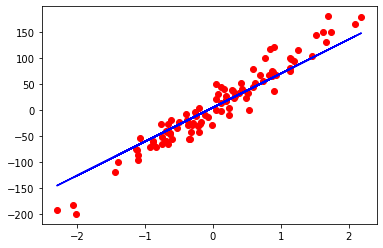

In [8]:
#3) training loop
num_epochs = 100
for epoch in range(num_epochs):
    #forward pass and loss
    y_hat = model(X)
    loss = criterion(y_hat, Y)
    
    #backward pass
    loss.backward()
    
    #update
    optimizer.step()
    
    #remember this guy
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f"epoch = {epoch+1} loss = {loss.item():.4f}")
        
#plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, Y_numpy, 'ro') #ro means red dots
plt.plot(X_numpy, predicted, 'b')